In [1]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
ADNIdf=pd.read_csv('ADNI_preds_vents_pyment.csv')
NCNdf=pd.read_csv('NCN_preds_vents_pyment.csv')
CPdf=pd.read_csv('CP_preds_vents_pyment.csv')
CogConVardf=pd.read_csv('CogConVar_preds_vents_pyment.csv')


In [8]:
#Regresion ADNI
Xadni = ADNIdf[['Ventricles']].copy()
yadni = ADNIdf['prediction']
modeladni = LinearRegression()
modeladni.fit(Xadni, yadni)
y_predadni = modeladni.predict(Xadni)

#Regresion NCN
Xncn = NCNdf[['Ventricles']].copy()
yncn = NCNdf['prediction']
modelncn = LinearRegression()
modelncn.fit(Xncn, yncn)
y_predncn = modelncn.predict(Xncn)

#Regresion CP
Xcp = CPdf[['Ventricles']].copy()
ycp = CPdf['prediction']
modelcp = LinearRegression()
modelcp.fit(Xcp, ycp)
y_predcp = modelcp.predict(Xcp)

#Regresion CogConVar
Xcogconvar = CogConVardf[['Ventricles']].copy()
ycogconvar = CogConVardf['prediction']
modelcogconvar = LinearRegression()
modelcogconvar.fit(Xcogconvar, ycogconvar)
y_predcogconvar = modelcogconvar.predict(Xcogconvar)

#regression for all datasets
Xall = pd.concat([ADNIdf[['Ventricles']], NCNdf[['Ventricles']], CPdf[['Ventricles']], CogConVardf[['Ventricles']]]).reset_index(drop=True)
yall = pd.concat([ADNIdf['prediction'], NCNdf['prediction'], CPdf['prediction'], CogConVardf['prediction']]).reset_index(drop=True)
modelall = LinearRegression()
modelall.fit(Xall, yall)
y_predall = modelall.predict(Xall)


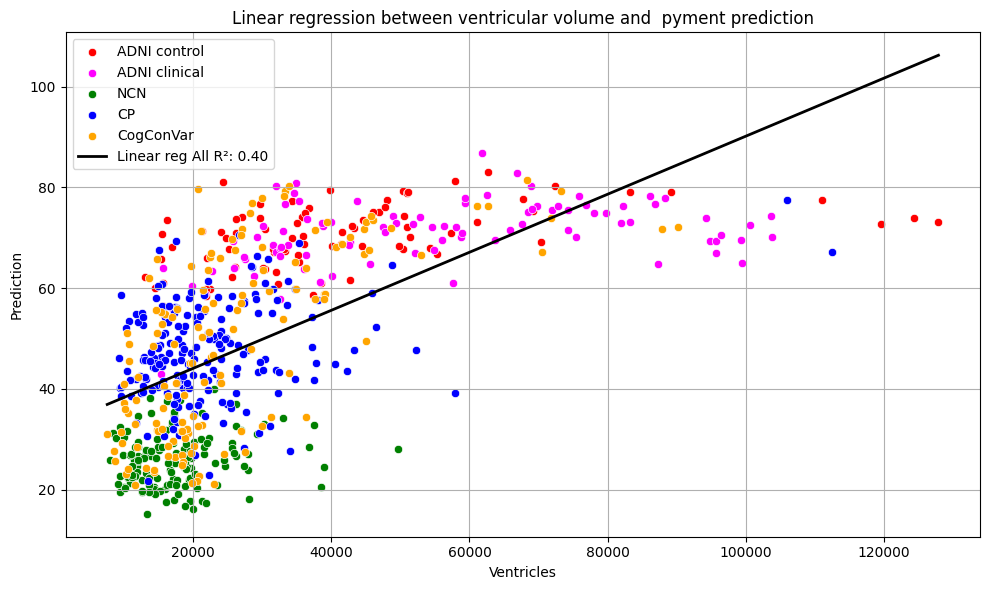

In [10]:
plt.figure(figsize=(10, 6))

# Rango de x para graficar la línea
x_rangeadni = np.linspace(ADNIdf['Ventricles'].min(), ADNIdf['Ventricles'].max(), 100)
y_lineadni = modeladni.coef_ * x_rangeadni + modeladni.intercept_

x_rangencn = np.linspace(NCNdf['Ventricles'].min(), NCNdf['Ventricles'].max(), 100)
y_linencn = modelncn.coef_ * x_rangencn + modelncn.intercept_

x_rangecp = np.linspace(CPdf['Ventricles'].min(), CPdf['Ventricles'].max(), 100)
y_linecp = modelcp.coef_ * x_rangecp + modelcp.intercept_

x_rangecogconvar = np.linspace(CogConVardf['Ventricles'].min(), CogConVardf['Ventricles'].max(), 100)
y_linecogconvar = modelcogconvar.coef_ * x_rangecogconvar + modelcogconvar.intercept_

x_rangeall = np.linspace(Xall['Ventricles'].min(), Xall['Ventricles'].max(), 100)
y_lineall = modelall.coef_ * x_rangeall + modelall.intercept_

# CN ADNI
sns.scatterplot(
    data=ADNIdf[ADNIdf['Group'] == 'CN'],
    x='Ventricles',
    y='prediction',
    color='red',
    label='ADNI control'
)
# Clinical ADNI
sns.scatterplot(
    data=ADNIdf[ADNIdf['Group'] != 'CN'],
    x='Ventricles',
    y='prediction',
    color='magenta',
    label='ADNI clinical'
)
# NCN
sns.scatterplot(
    data=NCNdf,
    x='Ventricles',
    y='prediction',
    color='green',
    label='NCN'
)
# CP
sns.scatterplot(
    data=CPdf,
    x='Ventricles',
    y='prediction',
    color='blue',
    label='CP'
)
# CogConVar
sns.scatterplot(
    data=CogConVardf,
    x='Ventricles',
    y='prediction',
    color='orange',
    label='CogConVar'
)

# Calcular y mostrar el valor de R²
r2_adni = r2_score(yadni, y_predadni)
r2_ncn = r2_score(yncn, y_predncn)
r2_cp = r2_score(ycp, y_predcp)
r2_cogconvar = r2_score(ycogconvar, y_predcogconvar)
r2_all = r2_score(yall, y_predall)


#plotear regresiones
#plt.plot(x_rangeadni, y_lineadni, color='red', linewidth=2, label=f'Linear reg ADNI R²: {r2_adni:.2f}')
#plt.plot(x_rangencn, y_linencn, color='green', linewidth=2, label=f'Linear reg NCN R²: {r2_ncn:.2f}')
#plt.plot(x_rangecp, y_linecp, color='blue', linewidth=2, label=f'Linear reg CP R²: {r2_cp:.2f}')
#plt.plot(x_rangecogconvar, y_linecogconvar, color='orange', linewidth=2, label=f'Linear reg CogConVar R²: {r2_cogconvar:.2f}')
plt.plot(x_rangeall, y_lineall, color='black', linewidth=2, label=f'Linear reg All R²: {r2_all:.2f}')


# Etiquetas y estética
plt.xlabel("Ventricles")
plt.ylabel("Prediction")
plt.title("Linear regression between ventricular volume and  pyment prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [13]:
ADNIdf['Group'].value_counts()

Group
CN      83
MCI     52
EMCI    16
SMC     12
LMCI     8
AD       5
Name: count, dtype: int64

In [5]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [6]:
fig = go.Figure()

fig.add_trace(
    go.Box(y=ADNIdf[ADNIdf['Group']!='CN']['Ventricles'], name="ADNI clinical", marker_color='magenta')
)
fig.add_trace(
    go.Box(y=ADNIdf[ADNIdf['Group']=='CN']['Ventricles'], name="ADNI CN", marker_color='red')
)
fig.add_trace(
    go.Box(y=CPdf['Ventricles'], name="CP", marker_color='blue')
)
fig.add_trace(
    go.Box(y=NCNdf['Ventricles'], name="NCN clinical", marker_color='green')
)
fig.add_trace(
    go.Box(y=CogConVardf['Ventricles'], name="CogConVar", marker_color='orange')
)

fig.update_layout(
    height=500, width=500, 
    title_text="Ventricle volume boxplots",
    title_font=dict(size=20, color='black')
)

#import plotly.io as pio
#pio.renderers.default = "browser" 

fig.show()